In [1]:
import pandas as pd
import numpy as np

# Suppressing scientific notation
np.set_printoptions(suppress=True)

StoreSalesData=pd.read_csv('D:\Data Scienece\IVY PRO\Python\Python Datasets\Python Datasets\external\shampoo\Shampoo.csv')
StoreSalesData.head()

,Month,Sales Value
0,01-01-2001,266.0
1,01-02-2001,145.9
2,01-03-2001,183.1
3,01-04-2001,119.3
4,01-05-2001,180.3


In [2]:
StoreSalesData.replace('\s+','',regex=True,inplace=True)
StoreSalesData.columns = StoreSalesData.columns.str.replace('\s+','',regex=True)

In [3]:
from datetime import datetime  
StoreSalesData["Month"]= pd.to_datetime(StoreSalesData["Month"],format='%d-%m-%Y')

In [4]:
StoreSalesData.head()

,Month,SalesValue
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


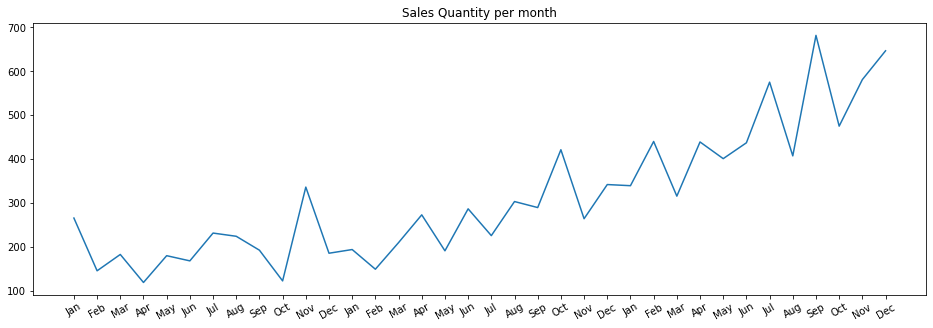

In [5]:
import matplotlib.pyplot as plt

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*3

# Plotting the sales
%matplotlib inline
StoreSalesData['SalesValue'].plot(kind='line', figsize=(16,5), title='Sales Quantity per month')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,36,1),MonthNames, rotation=30)

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(StoreSalesData['SalesValue'])
sm.graphics.tsa.plot_pacf(StoreSalesData['SalesValue'])
plt.show()

<ipython-input-6-378379bea6e5>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(series, model='additive', freq=12)


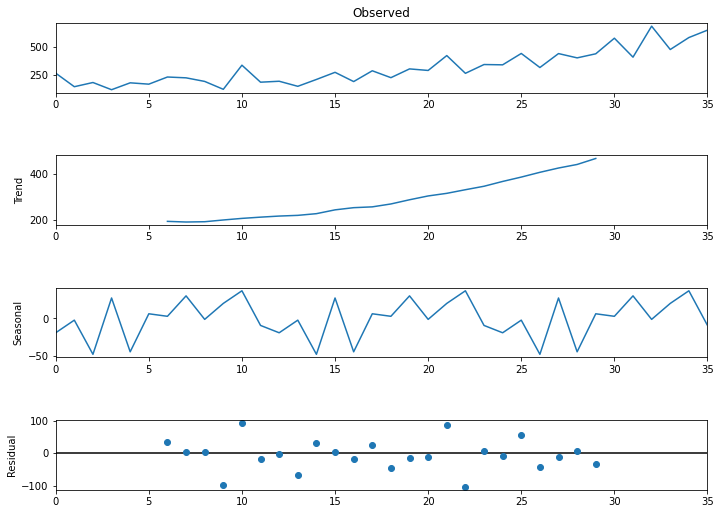

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = StoreSalesData['SalesValue'].values
result = seasonal_decompose(series, model='additive', freq=12)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

Next Six Month Forecast: 37    628.490823
38    609.206822
39    621.048596
40    593.524713
41    569.018181
42    484.757635
Name: Forecast, dtype: float64
#### Accuracy of model: 76.93 ####


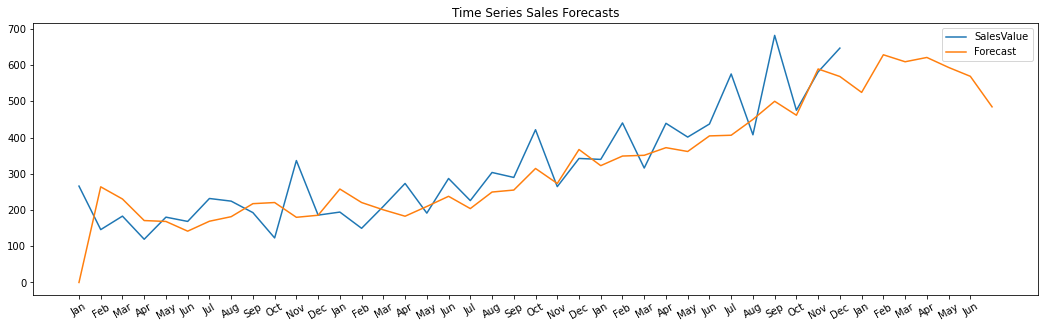

In [7]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX #sarimax uses the AR,MA models separately for trend and seasonal
import warnings 
warnings.filterwarnings('ignore')


# Train the model on the full dataset 
SarimaxModel = SARIMAX(StoreSalesData['SalesValue'],  
                        order = (1, 1, 1),  
                        seasonal_order =(4, 0, 1, 12))
SalesModel = SarimaxModel.fit()
  
# Forecast for the next 6 months
forecast = SalesModel.predict(start = 0,
                          end = (len(StoreSalesData['SalesValue'])) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])

# Plot the forecast values
StoreSalesData['SalesValue'].plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))

# Measuring the accuracy of the model
MAPE=np.mean(abs(StoreSalesData['SalesValue']-forecast)/StoreSalesData['SalesValue'])*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=MonthNames+MonthNames[0:6]
plotLabels=plt.xticks(np.arange(0,42,1),MonthNames, rotation=30)